#  Time series forecast using Facebook’s time series model Prophet.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

---------------------------------------------------------------------------------------------------------

Prophet decomposes time series data into trend, seasonality and holiday effect.

- Trend models non periodic changes in the time series data.

- Seasonality is caused due to the periodic changes like daily, weekly, or yearly seasonality.

- Holiday effect which occur on irregular schedules over a day or a period of days.

- Error terms is what is not explained by the model.

---------------------------------------------------------------------------------------

Advantages of Prophet
1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.

------------------------------------------------------------------------------------------------------

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt

### Meat Price Index

In [97]:
df = pd.read_excel('Meat_Price_Index1.xlsx')
df.head()

,ds,y,Poultry Meat,Pig Meat,Bovine Meat,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [98]:
df = df.tail(-1)
df

,ds,y,Poultry Meat,Pig Meat,Bovine Meat,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [99]:
df = df[['ds', 'y']]
df

,ds,y
1,1990-01-01,73.374551
2,1990-02-01,75.956526
3,1990-03-01,77.805859
4,1990-04-01,80.442049
5,1990-05-01,80.994505
...,...,...
392,2022-08-01,121.094630
393,2022-09-01,120.276505
394,2022-10-01,116.833380
395,2022-11-01,115.186901


In [100]:
df.info()

#Y = Meat Price Index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


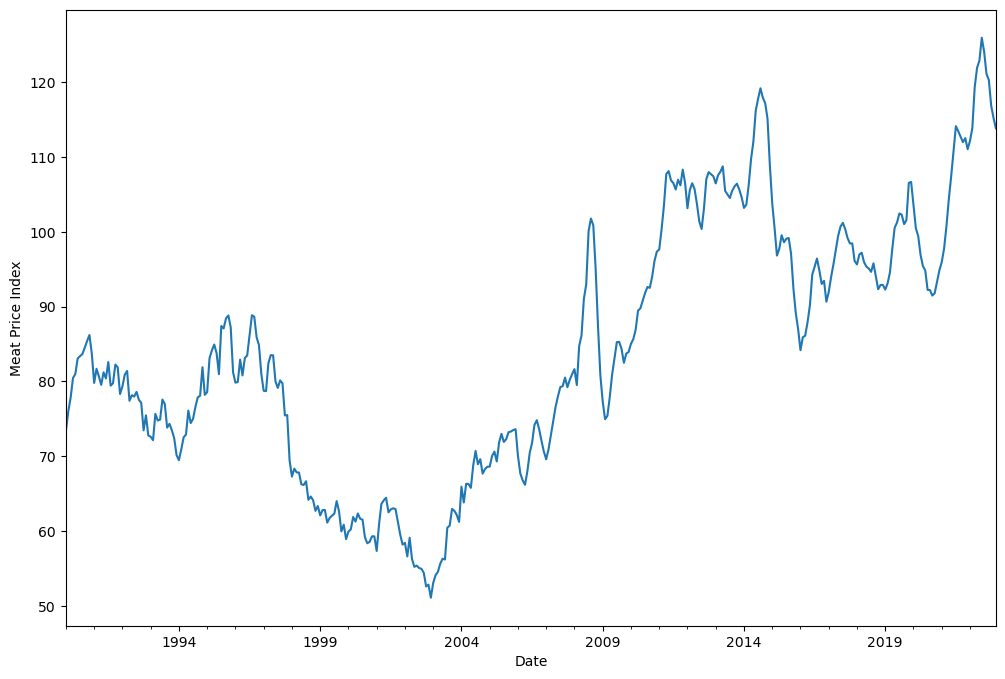

In [101]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Meat Price Index')
ax.set_xlabel('Date')
#ax.set_title('Meat Price Index - 1990 to 2022')
ax.legend().set_visible(False)

plt.savefig('Meat_Price_Index.png', dpi=300)

plt.show()

In [102]:
my_model = Prophet(interval_width=0.95)

In [103]:
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [104]:
print(my_model.seasonalities)

OrderedDict([('yearly', {'period': 365.25, 'fourier_order': 10, 'prior_scale': 10.0, 'mode': 'additive', 'condition_name': None})])


In [105]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [106]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,79.054995,66.580616,91.830375
1,1990-02-01,79.611144,66.362117,91.741818
2,1990-03-01,80.637018,69.257866,91.590984
3,1990-04-01,81.389190,68.288914,93.230601
4,1990-05-01,82.217805,70.686093,94.368459


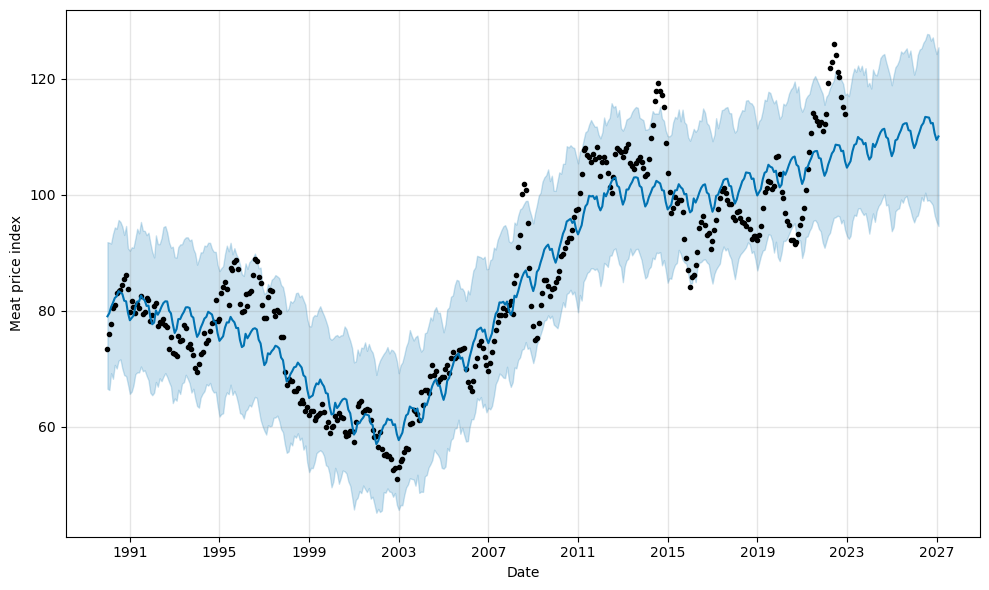

In [107]:
my_model.plot(forecast, uncertainty=True,  xlabel='Date', ylabel='Meat price index')
#plt.title('Forecast of Meat Price Index')

plt.savefig('Forecast of Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


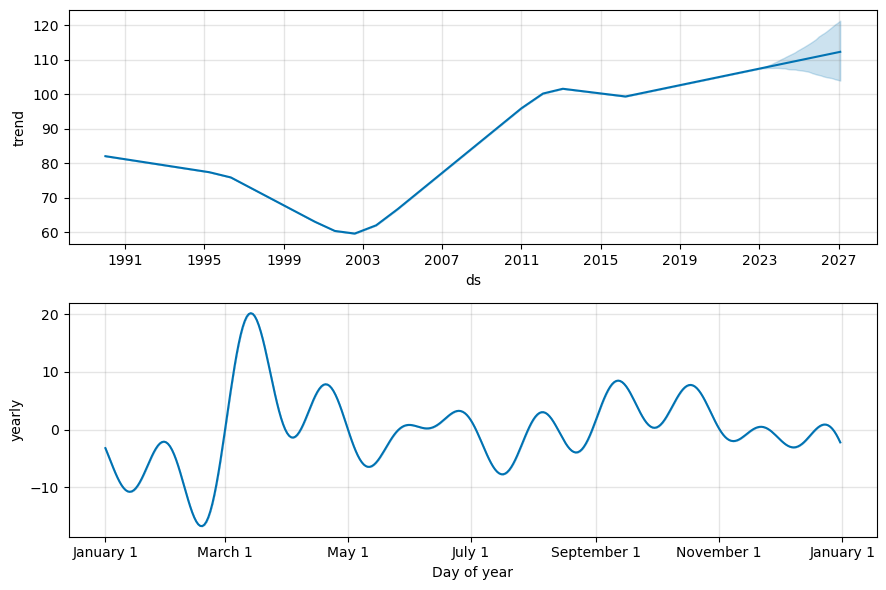

In [109]:
my_model.plot_components(forecast)
plt.savefig('Components of Meat_Price_Index.png', dpi=300)

### Poultry meat

In [15]:
df1 = pd.read_excel('Meat_Price_Index2.xlsx')
df1.head()

,ds,Meat Price Index,y,Pig Meat,Bovine Meat,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [16]:
df1 = df1.tail(-1)
df1

,ds,Meat Price Index,y,Pig Meat,Bovine Meat,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [17]:
df1 = df1[['ds', 'y']]
df1

,ds,y
1,1990-01-01,75.893824
2,1990-02-01,70.596114
3,1990-03-01,75.024054
4,1990-04-01,72.116789
5,1990-05-01,71.007243
...,...,...
392,2022-08-01,129.166053
393,2022-09-01,126.820833
394,2022-10-01,124.155496
395,2022-11-01,123.188825


In [18]:
df1.info()

#Y = Poultry Meat 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [19]:
#m = Prophet()
#m.fit(df1)

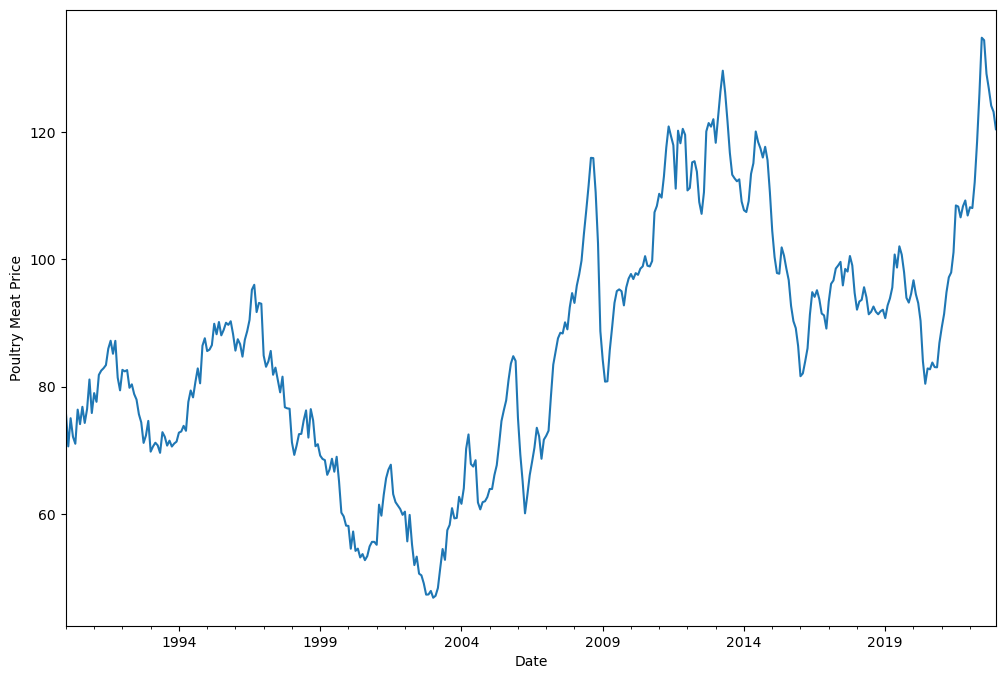

In [110]:
ax = df1.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Poultry Meat Price')
ax.set_xlabel('Date')
#ax.set_title('Poultry Meat Index - 1990 to 2022')
ax.legend().set_visible(False)

plt.savefig('Poultry_Meat_Price_Index.png', dpi=300)

plt.show()

In [111]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [112]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [113]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,78.669130,60.385160,95.808488
1,1990-02-01,78.410085,60.826958,96.748678
2,1990-03-01,79.639792,62.316946,97.305959
3,1990-04-01,80.674018,62.055222,99.616316
4,1990-05-01,81.833237,63.974637,99.919171


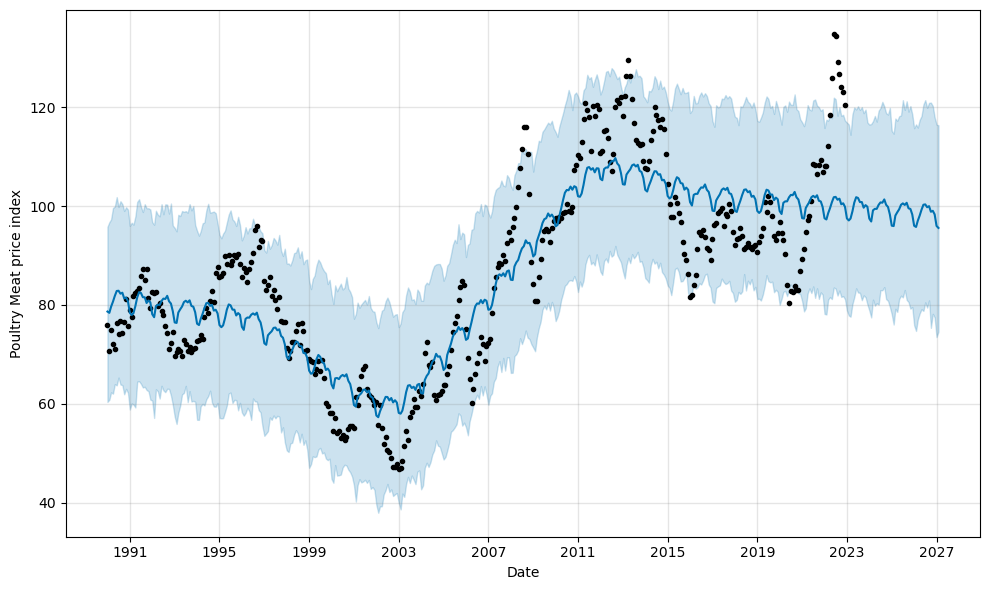

In [117]:
my_model.plot(forecast, uncertainty=True,  xlabel='Date', ylabel='Poultry Meat price index')
#plt.title('Forecast of Poultry Meat Price Index')
plt.savefig('Forecast of Poultry_Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


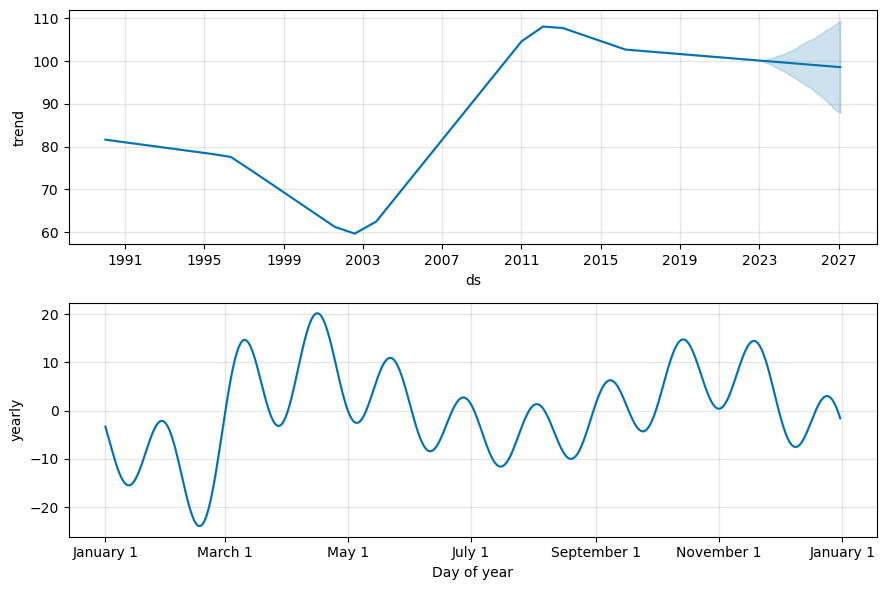

In [115]:
my_model.plot_components(forecast)
plt.savefig('Components of Poultry_Meat_Price_Index.png', dpi=300)

In [26]:
print(my_model)

In [27]:
my_model = Prophet(weekly_seasonality=False)

### Pig meat

In [118]:
df2 = pd.read_excel('Meat_Price_Index3.xlsx')
df2.head()

,ds,Meat Price Index,Poultry Meat,y,Bovine Meat,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [119]:
df2 = df2.tail(-1)
df2

,ds,Meat Price Index,Poultry Meat,y,Bovine Meat,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [120]:
df2 = df2[['ds', 'y']]
df2

,ds,y
1,1990-01-01,102.090340
2,1990-02-01,113.180140
3,1990-03-01,115.179936
4,1990-04-01,122.269818
5,1990-05-01,128.454038
...,...,...
392,2022-08-01,106.448590
393,2022-09-01,109.262070
394,2022-10-01,105.698375
395,2022-11-01,106.512810


In [121]:
df2.info()

#Y = Pig Meat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [122]:
m = Prophet()
m.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


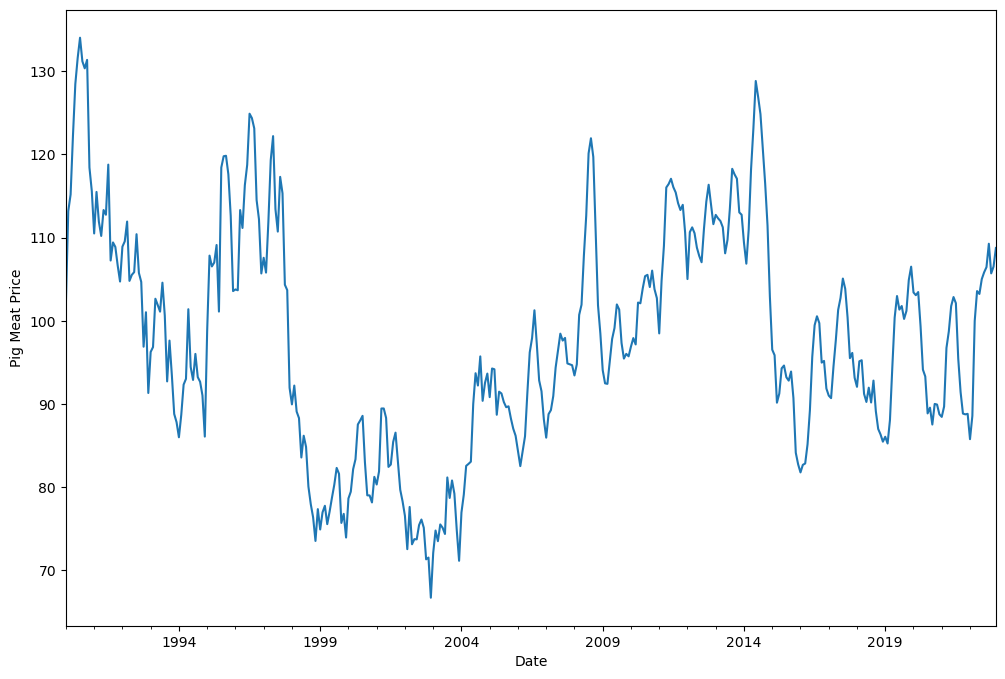

In [123]:
ax = df2.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Pig Meat Price')
ax.set_xlabel('Date')
#ax.set_title('Pig Meat Index - 1990 to 2022')
ax.legend().set_visible(False)

plt.savefig('Pig_Meat_Price_Index.png', dpi=300)

plt.show()

In [124]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [125]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [126]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,111.580079,95.596791,128.916935
1,1990-02-01,112.592628,94.450836,131.200954
2,1990-03-01,114.636840,98.095130,130.742991
3,1990-04-01,115.918281,97.145136,134.368638
4,1990-05-01,117.815808,98.855619,135.057499


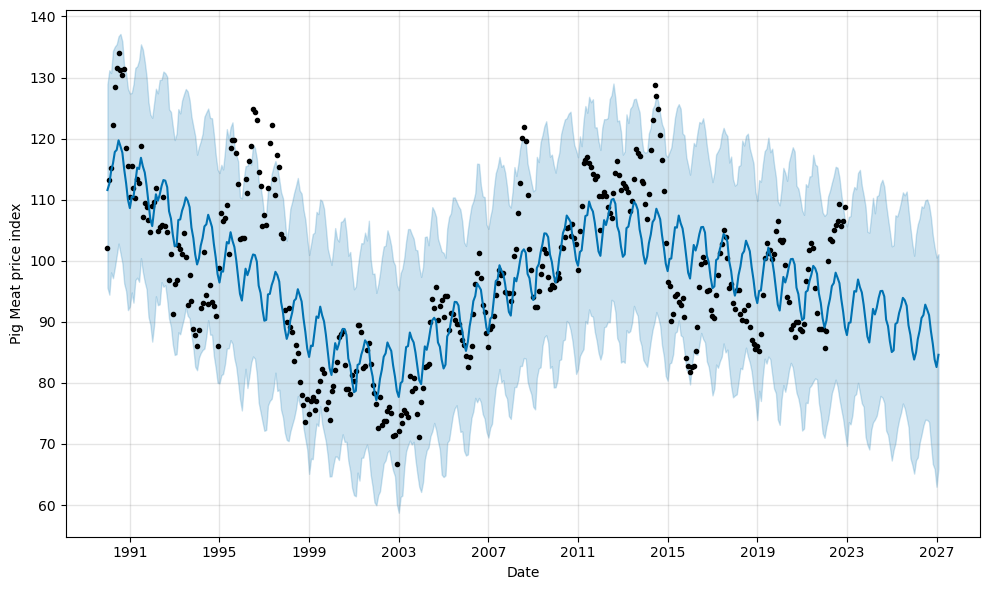

In [127]:
my_model.plot(forecast, uncertainty=True,  xlabel='Date', ylabel='Pig Meat price index')
#plt.title('Forecast of Pig Meat Price Index')
plt.savefig('Forecast of Pig_Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


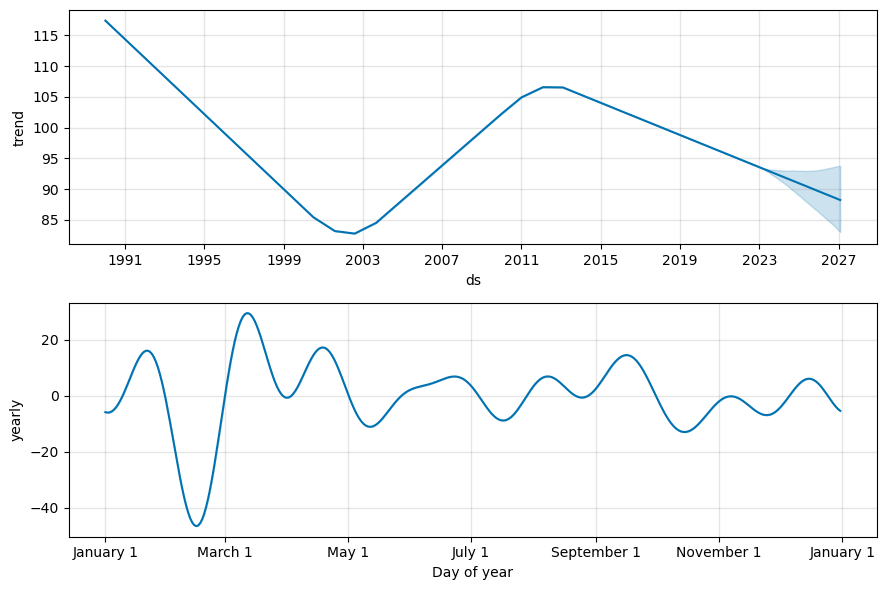

In [128]:
my_model.plot_components(forecast)
plt.savefig('Components of Pig_Meat_Price_Index.png', dpi=300)

### Bovine meat

In [129]:
df3 = pd.read_excel('Meat_Price_Index4.xlsx')
df3.head()

,ds,Meat Price Index,Poultry Meat,Pig Meat,y,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [130]:
df3 = df3.tail(-1)
df3

,ds,Meat Price Index,Poultry Meat,Pig Meat,y,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [131]:
df3 = df3[['ds', 'y']]
df3

,ds,y
1,1990-01-01,53.970614
2,1990-02-01,55.057798
3,1990-03-01,55.411055
4,1990-04-01,58.182112
5,1990-05-01,55.095727
...,...,...
392,2022-08-01,126.347290
393,2022-09-01,124.176584
394,2022-10-01,120.578565
395,2022-11-01,115.986483


In [132]:
df3.info()

#Y = Bovine Meat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [43]:
m = Prophet()
m.fit(df3)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


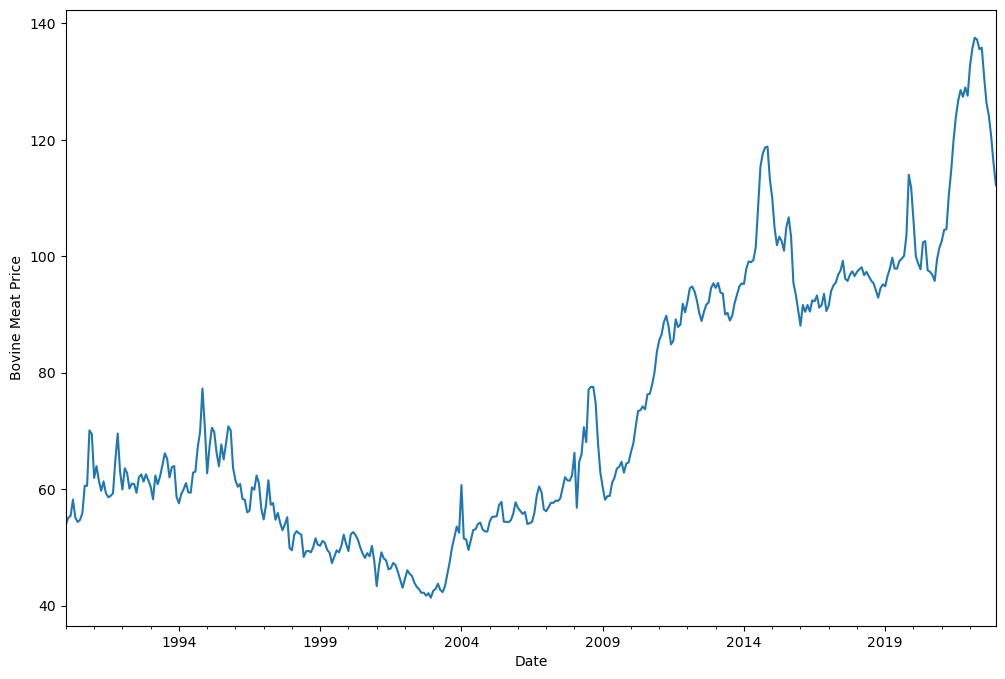

In [133]:
ax = df3.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bovine Meat Price')
ax.set_xlabel('Date')
#ax.set_title('Bovine Meat Index - 1990 to 2022')
ax.legend().set_visible(False)

plt.savefig('Bovine_Meat_Price_Index.png', dpi=300)

plt.show()

In [134]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df3)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [135]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [136]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,61.552445,47.751014,75.091734
1,1990-02-01,62.174103,49.126806,75.330927
2,1990-03-01,62.450284,48.061143,75.992515
3,1990-04-01,62.540110,49.249317,76.447185
4,1990-05-01,62.139058,48.839026,76.061126


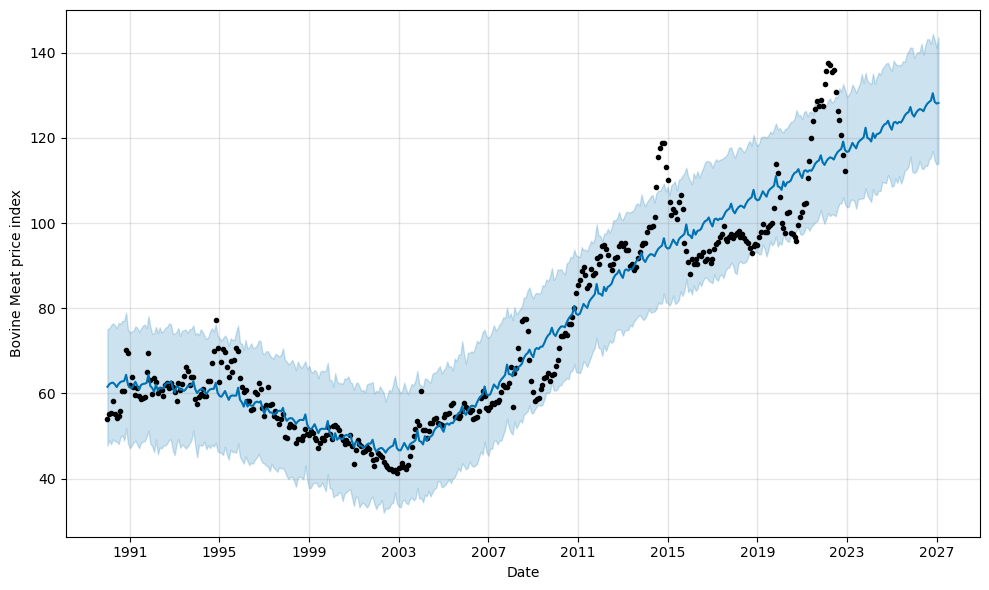

In [137]:
my_model.plot(forecast, uncertainty=True, xlabel='Date', ylabel='Bovine Meat price index')
#plt.title('Forecast of Bovine Meat Price Index')
plt.savefig('Forecast of Bovine_Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


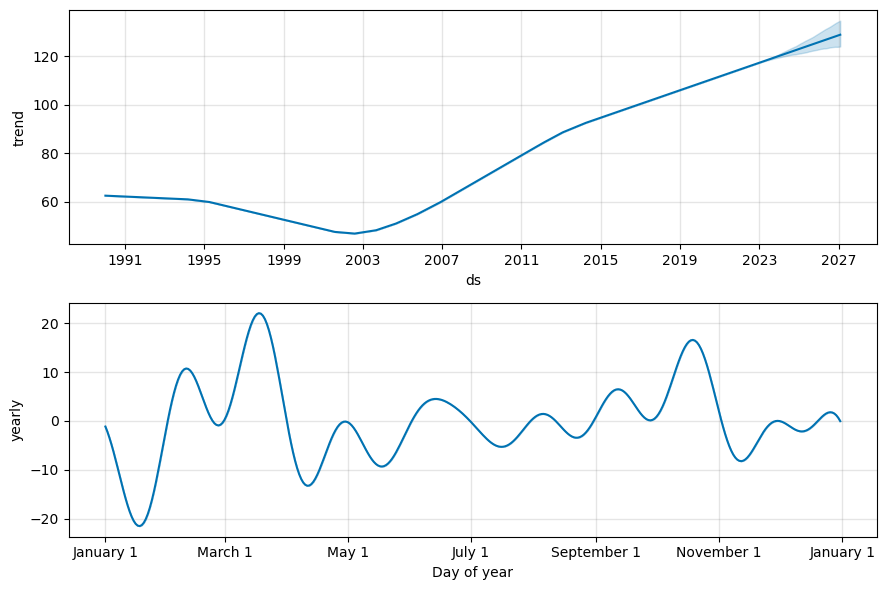

In [138]:
my_model.plot_components(forecast)
plt.savefig('Components of Bovine_Meat_Price_Index.png', dpi=300)

### Ovine meat

In [139]:
df4 = pd.read_excel('Meat_Price_Index5.xlsx')
df4.head()

,ds,Meat Price Index,Poultry Meat,Pig Meat,Bovine Meat,y
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [140]:
df4 = df4.tail(-1)
df4

,ds,Meat Price Index,Poultry Meat,Pig Meat,Bovine Meat,y
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [141]:
df4 = df4[['ds', 'y']]
df4

,ds,y
1,1990-01-01,29.917755
2,1990-02-01,32.222947
3,1990-03-01,31.046829
4,1990-04-01,34.010648
5,1990-05-01,35.774826
...,...,...
392,2022-08-01,129.812434
393,2022-09-01,124.790306
394,2022-10-01,119.258673
395,2022-11-01,120.951079


In [142]:
df4.info()

#Y = Ovine Meat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 1 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      396 non-null    datetime64[ns]
 1   y       396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [54]:
m = Prophet()
m.fit(df4)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


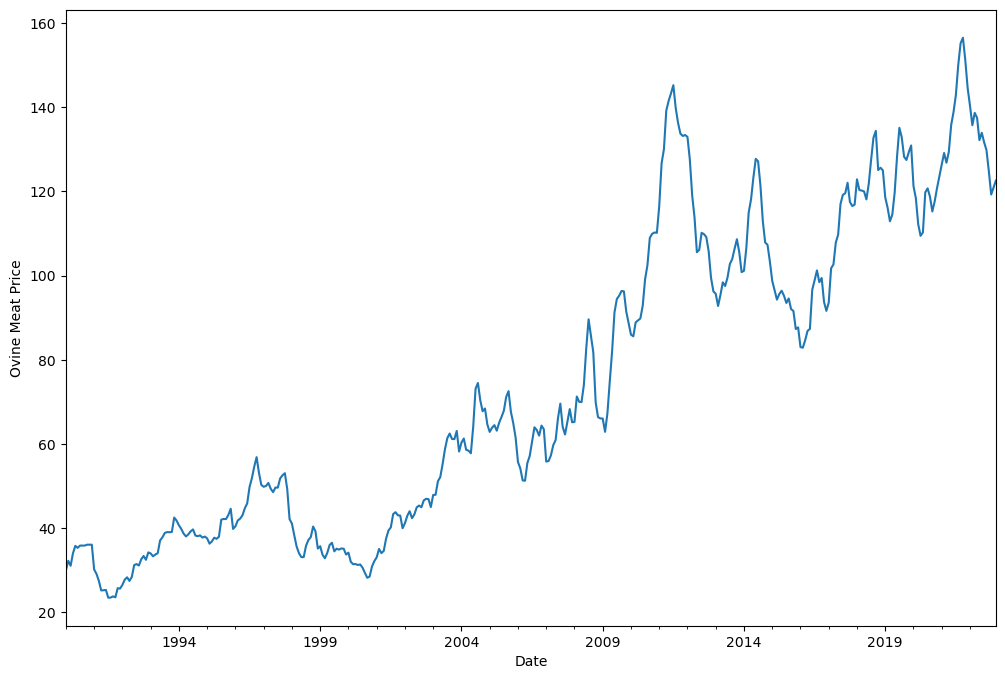

In [143]:
ax = df4.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Ovine Meat Price')
ax.set_xlabel('Date')
#ax.set_title('Ovine Meat Index - 1990 to 2022')
ax.legend().set_visible(False)

plt.savefig('Ovine_Meat_Price_Index.png', dpi=300)

plt.show()

In [144]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df4)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [57]:
future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
future_dates.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [145]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


#ds: the datestamp of the forecasted value
#yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,29.352318,8.101766,53.991209
1,1990-02-01,29.630213,6.077681,52.062937
2,1990-03-01,28.853922,6.142831,51.214176
3,1990-04-01,29.801834,7.155157,51.352324
4,1990-05-01,31.072085,8.588651,53.378883


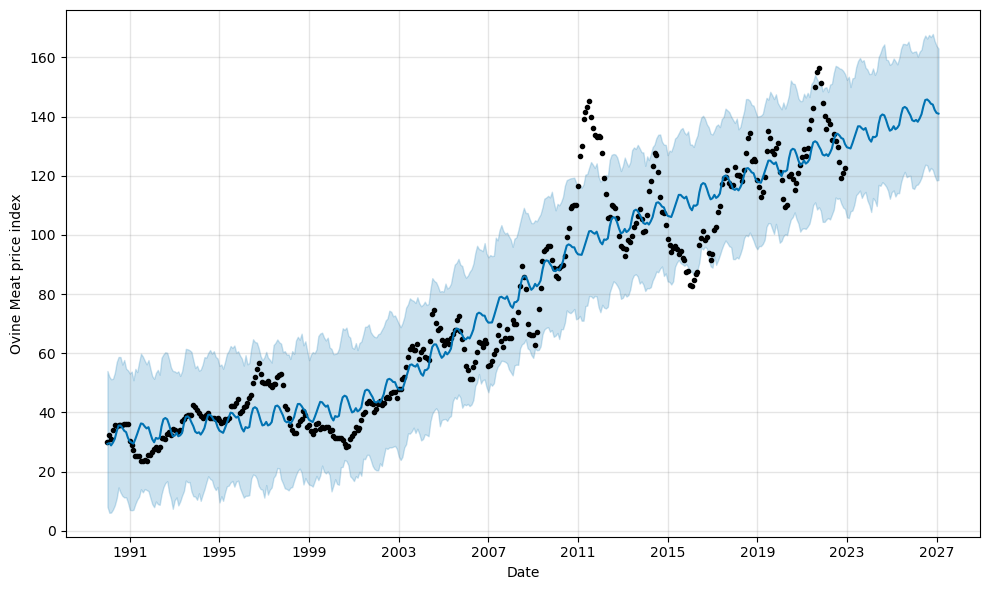

In [146]:
my_model.plot(forecast, uncertainty=True, xlabel='Date', ylabel='Ovine Meat price index')
#plt.title('Forecast of Ovine Meat Price Index')
plt.savefig('Forecast of Ovine_Meat_Price_Index.png', dpi=300)

C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


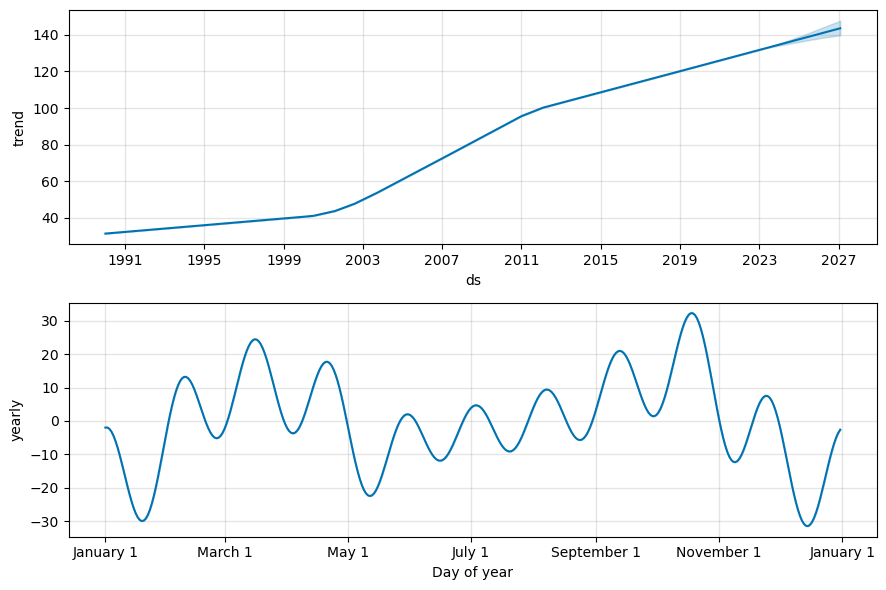

In [147]:
my_model.plot_components(forecast)
plt.savefig('Components of Ovine_Meat_Price_Index.png', dpi=300)

### Modelo Prophet vs Arima

+ Prophet

1. Meat Price Index

In [61]:
# Avalie a performance do modelo
mae = (forecast['yhat'] - df['y']).abs().mean()
mse = ((forecast['yhat'] - df['y'])**2).mean()
rmse = ((forecast['yhat'] - df['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df['y']).abs() / df['y']).mean()

metrics = {
    'MAE': mae, #mede a média das diferenças absolutas entre as previsões do modelo e os valores reais. Quanto menor o MAE, melhor a performance do modelo.
    'MSE': mse, #mede a média das diferenças ao quadrado entre as previsões do modelo e os valores reais. É uma métrica sensível a valores extremos. Quanto menor o MSE, melhor a performance do modelo.
    'RMSE': rmse, #é a raiz quadrada do MSE. É uma métrica mais intuitiva, pois tem a mesma unidade de medida que os dados originais. Quanto menor o RMSE, melhor a performance do modelo.
    'MAPE': mape #mede a média das diferenças percentuais entre as previsões do modelo e os valores reais. É uma métrica que considera a magnitude dos erros em relação aos valores reais. Quanto menor o MAPE, melhor a performance do modelo.
}

# Imprima as métricas de performance do modelo
print("Métricas de performance do modelo:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Métricas de performance do modelo:
MAE: 20.29
MSE: 660.11
RMSE: 25.69
MAPE: 0.25


In [62]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

df = pd.read_excel('Meat_Price_Index1.xlsx')
df = df.tail(-1)
df = df[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df['y']).abs() / df['y']).mean()
r2 = r2_score(df['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 5.22
MSE: 40.80
RMSE: 6.39
MAPE: 0.06
R-squared: 0.86


2. Poultry Meat

In [63]:
# Avalie a performance do modelo
mae = (forecast['yhat'] - df1['y']).abs().mean()
mse = ((forecast['yhat'] - df1['y'])**2).mean()
rmse = ((forecast['yhat'] - df1['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df1['y']).abs() / df1['y']).mean()

metrics = {
    'MAE': mae, #mede a média das diferenças absolutas entre as previsões do modelo e os valores reais. Quanto menor o MAE, melhor a performance do modelo.
    'MSE': mse, #mede a média das diferenças ao quadrado entre as previsões do modelo e os valores reais. É uma métrica sensível a valores extremos. Quanto menor o MSE, melhor a performance do modelo.
    'RMSE': rmse, #é a raiz quadrada do MSE. É uma métrica mais intuitiva, pois tem a mesma unidade de medida que os dados originais. Quanto menor o RMSE, melhor a performance do modelo.
    'MAPE': mape #mede a média das diferenças percentuais entre as previsões do modelo e os valores reais. É uma métrica que considera a magnitude dos erros em relação aos valores reais. Quanto menor o MAPE, melhor a performance do modelo.
}

# Imprima as métricas de performance do modelo
print("Métricas de performance do modelo:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Métricas de performance do modelo:
MAE: 8.56
MSE: 113.26
RMSE: 10.64
MAPE: 0.10


In [64]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

df1 = pd.read_excel('Meat_Price_Index2.xlsx')
df1 = df1.tail(-1)
df1 = df1[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df1)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df1['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df1['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df1['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df1['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df1['y']).abs() / df1['y']).mean()
r2 = r2_score(df1['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 7.68
MSE: 90.40
RMSE: 9.51
MAPE: 0.09
R-squared: 0.76


3. Pig Meat

In [65]:
# Avalie a performance do modelo
mae = (forecast['yhat'] - df2['y']).abs().mean()
mse = ((forecast['yhat'] - df2['y'])**2).mean()
rmse = ((forecast['yhat'] - df2['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df2['y']).abs() / df2['y']).mean()

metrics = {
    'MAE': mae, #mede a média das diferenças absolutas entre as previsões do modelo e os valores reais. Quanto menor o MAE, melhor a performance do modelo.
    'MSE': mse, #mede a média das diferenças ao quadrado entre as previsões do modelo e os valores reais. É uma métrica sensível a valores extremos. Quanto menor o MSE, melhor a performance do modelo.
    'RMSE': rmse, #é a raiz quadrada do MSE. É uma métrica mais intuitiva, pois tem a mesma unidade de medida que os dados originais. Quanto menor o RMSE, melhor a performance do modelo.
    'MAPE': mape #mede a média das diferenças percentuais entre as previsões do modelo e os valores reais. É uma métrica que considera a magnitude dos erros em relação aos valores reais. Quanto menor o MAPE, melhor a performance do modelo.
}

# Imprima as métricas de performance do modelo
print("Métricas de performance do modelo:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Métricas de performance do modelo:
MAE: 15.04
MSE: 356.15
RMSE: 18.87
MAPE: 0.15


In [66]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

df2 = pd.read_excel('Meat_Price_Index3.xlsx')
df2 = df2.tail(-1)
df2 = df2[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df2)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df2['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df2['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df2['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df2['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df2['y']).abs() / df2['y']).mean()
r2 = r2_score(df2['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 7.34
MSE: 84.51
RMSE: 9.19
MAPE: 0.08
R-squared: 0.55


4. Bovine Meat

In [67]:
# Avalie a performance do modelo
mae = (forecast['yhat'] - df3['y']).abs().mean()
mse = ((forecast['yhat'] - df3['y'])**2).mean()
rmse = ((forecast['yhat'] - df3['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df3['y']).abs() / df3['y']).mean()

metrics = {
    'MAE': mae, #mede a média das diferenças absolutas entre as previsões do modelo e os valores reais. Quanto menor o MAE, melhor a performance do modelo.
    'MSE': mse, #mede a média das diferenças ao quadrado entre as previsões do modelo e os valores reais. É uma métrica sensível a valores extremos. Quanto menor o MSE, melhor a performance do modelo.
    'RMSE': rmse, #é a raiz quadrada do MSE. É uma métrica mais intuitiva, pois tem a mesma unidade de medida que os dados originais. Quanto menor o RMSE, melhor a performance do modelo.
    'MAPE': mape #mede a média das diferenças percentuais entre as previsões do modelo e os valores reais. É uma métrica que considera a magnitude dos erros em relação aos valores reais. Quanto menor o MAPE, melhor a performance do modelo.
}

# Imprima as métricas de performance do modelo
print("Métricas de performance do modelo:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Métricas de performance do modelo:
MAE: 28.76
MSE: 1071.86
RMSE: 32.74
MAPE: 0.48


In [68]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

df3 = pd.read_excel('Meat_Price_Index4.xlsx')
df3 = df3.tail(-1)
df3 = df3[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df3)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df3['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df3['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df3['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df3['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df3['y']).abs() / df3['y']).mean()
r2 = r2_score(df3['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 5.29
MSE: 48.47
RMSE: 6.96
MAPE: 0.07
R-squared: 0.91


5. Ovine Meat

In [69]:
# Avalie a performance do modelo
mae = (forecast['yhat'] - df4['y']).abs().mean()
mse = ((forecast['yhat'] - df4['y'])**2).mean()
rmse = ((forecast['yhat'] - df4['y'])**2).mean() ** 0.5
mape = ((forecast['yhat'] - df4['y']).abs() / df4['y']).mean()

metrics = {
    'MAE': mae, #mede a média das diferenças absolutas entre as previsões do modelo e os valores reais. Quanto menor o MAE, melhor a performance do modelo.
    'MSE': mse, #mede a média das diferenças ao quadrado entre as previsões do modelo e os valores reais. É uma métrica sensível a valores extremos. Quanto menor o MSE, melhor a performance do modelo.
    'RMSE': rmse, #é a raiz quadrada do MSE. É uma métrica mais intuitiva, pois tem a mesma unidade de medida que os dados originais. Quanto menor o RMSE, melhor a performance do modelo.
    'MAPE': mape #mede a média das diferenças percentuais entre as previsões do modelo e os valores reais. É uma métrica que considera a magnitude dos erros em relação aos valores reais. Quanto menor o MAPE, melhor a performance do modelo.
}

# Imprima as métricas de performance do modelo
print("Métricas de performance do modelo:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Métricas de performance do modelo:
MAE: 16.33
MSE: 408.30
RMSE: 20.21
MAPE: 0.30


In [70]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

df4 = pd.read_excel('Meat_Price_Index5.xlsx')
df4 = df4.tail(-1)
df4 = df4[['ds', 'y']]

my_model = Prophet(interval_width=0.95)
my_model.fit(df4)

future_dates = my_model.make_future_dataframe(periods=50, freq='MS')
forecast = my_model.predict(future_dates)

# Slice the forecast dataframe to exclude the projections
forecast_actual = forecast[forecast['ds'] <= df4['ds'].max()]

# Evaluate the performance of the model
mae = (forecast_actual['yhat'] - df4['y']).abs().mean()
mse = ((forecast_actual['yhat'] - df4['y'])**2).mean()
rmse = ((forecast_actual['yhat'] - df4['y'])**2).mean() ** 0.5
mape = ((forecast_actual['yhat'] - df4['y']).abs() / df4['y']).mean()
r2 = r2_score(df4['y'], forecast_actual['yhat'])

metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R-squared': r2
}

# Print the performance metrics of the model
print("Performance metrics of the model:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\tools\anaconda3\envs\teste\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Performance metrics of the model:
MAE: 8.35
MSE: 133.14
RMSE: 11.54
MAPE: 0.13
R-squared: 0.90


+ ARIMA

In [157]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [71]:
data = pd.read_excel('Meat_Price_Index.xlsx')
data.head()

,Date,Meat Price Index,Poultry Meat,Pig Meat,Bovine Meat,Ovine Meat
0,NaT,NaN,NaN,NaN,NaN,NaN
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648


In [72]:
data = data.tail(-1)
data

,Date,Meat Price Index,Poultry Meat,Pig Meat,Bovine Meat,Ovine Meat
1,1990-01-01,73.374551,75.893824,102.090340,53.970614,29.917755
2,1990-02-01,75.956526,70.596114,113.180140,55.057798,32.222947
3,1990-03-01,77.805859,75.024054,115.179936,55.411055,31.046829
4,1990-04-01,80.442049,72.116789,122.269818,58.182112,34.010648
5,1990-05-01,80.994505,71.007243,128.454038,55.095727,35.774826
...,...,...,...,...,...,...
392,2022-08-01,121.094630,129.166053,106.448590,126.347290,129.812434
393,2022-09-01,120.276505,126.820833,109.262070,124.176584,124.790306
394,2022-10-01,116.833380,124.155496,105.698375,120.578565,119.258673
395,2022-11-01,115.186901,123.188825,106.512810,115.986483,120.951079


In [73]:
data = data[['Date', 'Meat Price Index']]

In [74]:
data = data.set_index(data['Date'])
data=data.drop(['Date'], axis=1)

In [75]:
data

,Meat Price Index
Date,
1990-01-01,73.374551
1990-02-01,75.956526
1990-03-01,77.805859
1990-04-01,80.442049
1990-05-01,80.994505
...,...
2022-08-01,121.094630
2022-09-01,120.276505
2022-10-01,116.833380


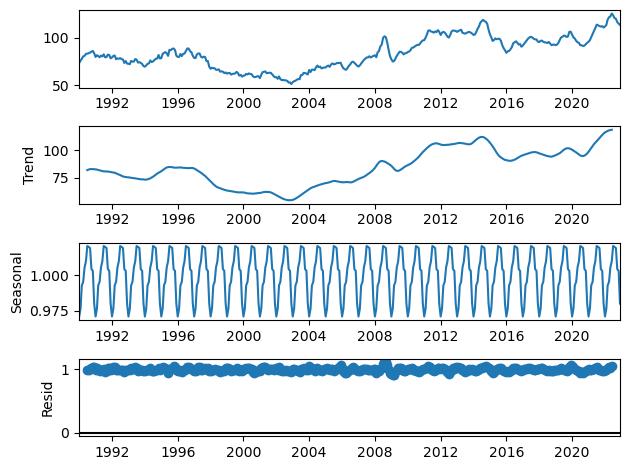

In [76]:
#importing libraries
import statsmodels.tsa.api as tsa

result = tsa.seasonal_decompose(data, model='multiplicative', period = 12)
figure=result.plot()

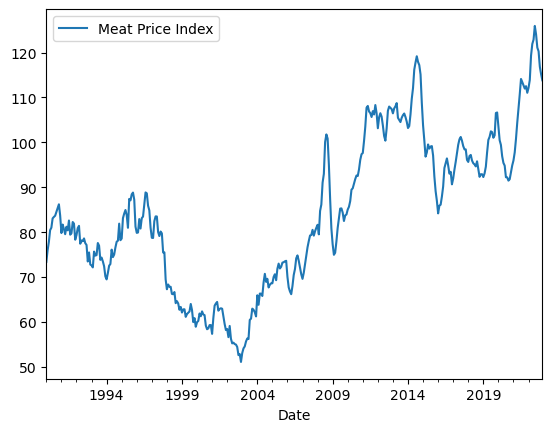

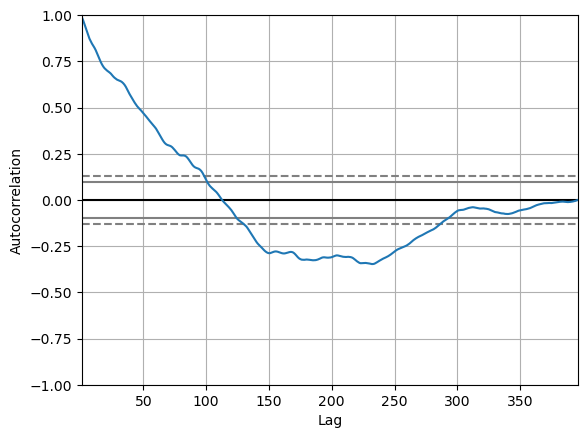

In [77]:
from pandas.plotting import autocorrelation_plot

data = pd.read_excel('Meat_Price_Index.xlsx')
data = data.tail(-1)
data = data[['Date', 'Meat Price Index']]
data = data.set_index('Date')
data.plot()
plt.show()
autocorrelation_plot(data)
plt.show()

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  396
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -799.470
Date:                              Thu, 09 Mar 2023   AIC                           1612.941
Time:                                      12:58:45   BIC                           1640.793
Sample:                                  01-01-1990   HQIC                          1623.976
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4220      0.143      9.948      0.000       1.142       1.702
ar.L2         -0.71

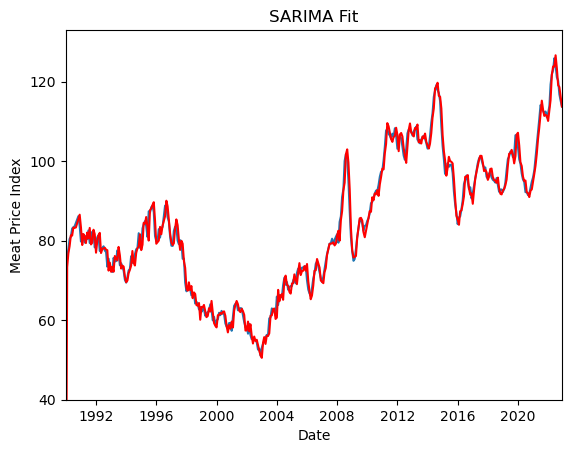

In [78]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Import data
data = pd.read_excel('Meat_Price_Index.xlsx')
data = data.set_index('Date')
data = data.dropna()
y = data['Meat Price Index']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Meat Price Index')
plt.xlim(data.index[0], data.index[-1]) # Define the range of values on the x-axis.
plt.ylim(40, None) # Limit the y-axis from 50
plt.show()

In [79]:
from statsmodels.tsa.arima_model import ARIMA

####fit model
p = 2 #number of lags
d = 1 #degree of differencing
q = 2 #size of the moving average window

model = tsa.arima.ARIMA(data['Meat Price Index'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       Meat Price Index   No. Observations:                  396
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -815.791
Date:                Thu, 09 Mar 2023   AIC                           1641.583
Time:                        12:58:46   BIC                           1661.477
Sample:                    01-01-1990   HQIC                          1649.465
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5859      0.057     27.929      0.000       1.475       1.697
ar.L2         -0.8775      0.052    -16.912      0.000      -0.979      -0.776
ma.L1         -1.3801      0.072    -19.040      0.0

In [80]:
data = data[['Meat Price Index']]

ARIMA (2,1,2)

In [81]:
from statsmodels.tsa.arima.model import ARIMA

# Treinar o modelo ARIMA
p = 2
d = 1
q = 2

model = ARIMA(data[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

In [83]:
actuals = data['2021-01-01':'2022-12-01']
#são dados

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)


print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

MAE: 18.77233382377527
MSE: 417.6442648636746
RMSE: 20.436346661369654
R²: -5.990110006506446


In [85]:
from statsmodels.tsa.arima.model import ARIMA

# Treinar o modelo ARIMA
p = 2
d = 1
q = 2

model = ARIMA(data[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data['2021-01-01':'2022-12-01']
#são dados

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)


print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

MAE: 18.77233382377527
MSE: 417.6442648636746
RMSE: 20.436346661369654
R²: -5.990110006506446


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Sarima(2,1,2)(1,0,1,12)

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Treinar o modelo SARIMA
p = 2
d = 1
q = 2
P = 1  # seasonal order
D = 0  # seasonal difference
Q = 1  # seasonal moving average order
s = 12  # seasonal period

model = SARIMAX(data[:'2020-12-01'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [87]:
#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

In [88]:
actuals = data['2021-01-01':'2022-12-01']
#são dados

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)


print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

MAE: 17.832121943276846
MSE: 375.5950800671828
RMSE: 19.380275541570164
R²: -5.286333007420061


Random Forest implementation
+ não o mais apropriado para séries temporais

In [90]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.index, data['Meat Price Index'], test_size=0.2, random_state=42)

# Transformando arrays de uma dimensão em arrays de duas dimensões
X_train = np.reshape(X_train, (-1, 1))
X_test = np.reshape(X_test, (-1, 1))

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)

print('Random Forest Regressor:')
print('MAE:', rf_mae)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)
print('R²:', rf_r2)

Random Forest Regressor:
MAE: 1.2129753420620297
MSE: 2.3206238807794084
RMSE: 1.5233594063054878
R²: 0.9921483477155487


LSTM RNN

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregando os dados
data = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removendo valores nulos
data.dropna(subset=['Meat Price Index'], inplace=True)

# Convertendo a coluna de datas para valores numéricos
data['days_since'] = (data.index - data.index.min()).days

# Separando os dados em treino e teste
train_data, test_data = train_test_split(data['Meat Price Index'], test_size=0.2, shuffle=False)

# Normalizando os dados
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparando os dados para o modelo LSTM
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Fazendo previsões
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Avaliando o modelo
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 6s 59ms/step - loss: 0.1524
Epoch 2/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0268
Epoch 3/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0325
Epoch 4/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0126
Epoch 5/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0199
Epoch 6/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0152
Epoch 7/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0108
Epoch 8/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0125
Epoch 9/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0106
Epoch 10/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0099
Epoch 11/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0099
Epoch 12/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0089
Epoch 13/50
4/4 [==============================] - 0s 42ms/st

ARIMA/SARIMA no periodo base 1990-2022 + projeções a 5 anos (de 2023 até 2027)

In [92]:
start_date = data.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data.loc[start_date:end_date, 'Meat Price Index']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

NameError: name 'mean_absolute_percentage_error' is not defined

--------------------------------------------------------------------

Poltry Meat

In [286]:
data1 = pd.read_excel('Meat_Price_Index.xlsx')
data1 = data1.tail(-1)
data1 = data1[['Date', 'Poultry Meat']]
data1 = data1.set_index(data1['Date'])
data1 = data1.drop(['Date'], axis=1)

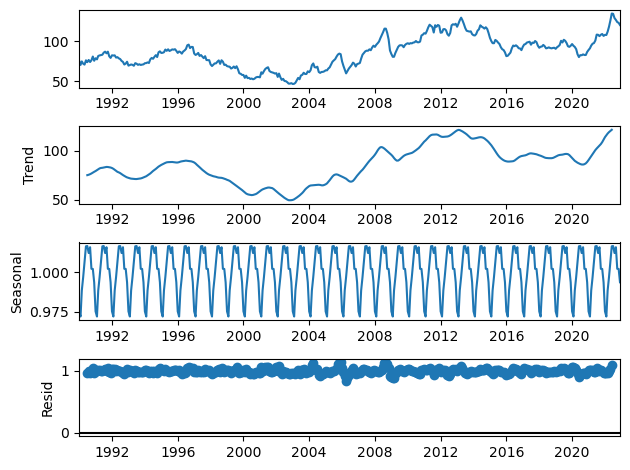

In [299]:
import statsmodels.tsa.api as tsa

result = tsa.seasonal_decompose(data1, model='multiplicative', period = 12)
figure=result.plot()

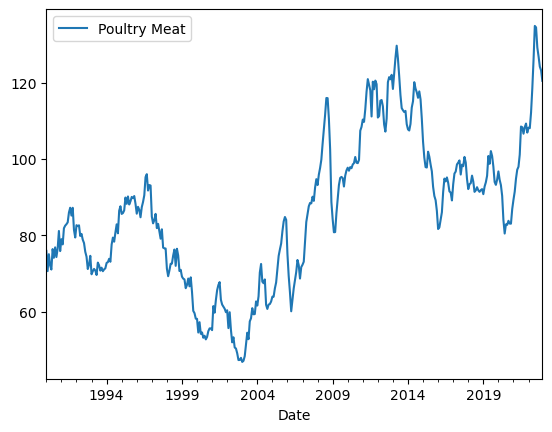

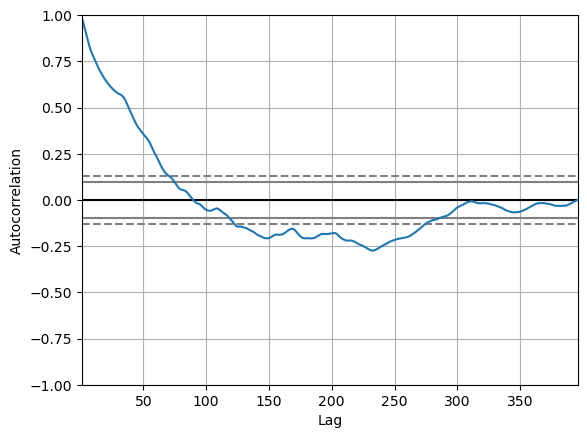

In [307]:
from pandas.plotting import autocorrelation_plot

data1 = pd.read_excel('Meat_Price_Index.xlsx')
data1 = data1.tail(-1)
data1 = data1[['Date', 'Poultry Meat']]
data1 = data1.set_index('Date')
data1.plot()
plt.show()
autocorrelation_plot(data1)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  396
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -976.852
Date:                Sun, 05 Mar 2023   AIC                           1963.704
Time:                        23:07:25   BIC                           1983.599
Sample:                    01-01-1990   HQIC                          1971.587
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2124      0.045      4.752      0.000       0.125       0.300
ar.L2          0.0949      0.052      1.833      0.067      -0.007       0.196
ar.L3          0.0548      0.054      1.016      0.3

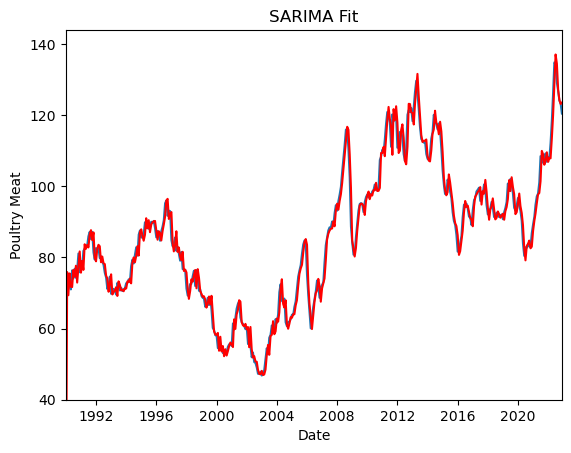

In [308]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Import data
data1 = pd.read_excel('Meat_Price_Index.xlsx')
data1 = data1.set_index('Date')
data1 = data1.dropna()
y = data1['Poultry Meat']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Poultry Meat')
plt.xlim(data1.index[0], data1.index[-1]) # Define the range of values on the x-axis.
plt.ylim(40, None) # Limit the y-axis from 50
plt.show()

In [318]:
from statsmodels.tsa.arima_model import ARIMA

####fit model
p = 4 #number of lags
d = 1 #degree of differencing
q = 0 #size of the moving average window

model = tsa.arima.ARIMA(data1['Poultry Meat'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:           Poultry Meat   No. Observations:                  396
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -976.852
Date:                Sun, 05 Mar 2023   AIC                           1963.704
Time:                        23:18:32   BIC                           1983.599
Sample:                    01-01-1990   HQIC                          1971.587
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2124      0.045      4.752      0.000       0.125       0.300
ar.L2          0.0949      0.052      1.833      0.067      -0.007       0.196
ar.L3          0.0548      0.054      1.016      0.3

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [323]:
data1 = data1[['Poultry Meat']]

ARIMA(4,1,0)

In [328]:
from statsmodels.tsa.arima.model import ARIMA

# Treinar o modelo ARIMA
p = 4
d = 1
q = 0

model = ARIMA(data1[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data1['2021-01-01':'2022-12-01']
#são dados

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)


print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

MAE: 24.4441557746883
MSE: 767.641440937327
RMSE: 27.70634297299676
R²: -3.57580827820842


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


LSTM RNN

In [338]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregando os dados
data1 = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removendo valores nulos
data1.dropna(subset=['Poultry Meat'], inplace=True)

# Convertendo a coluna de datas para valores numéricos
data1['days_since'] = (data1.index - data1.index.min()).days

# Separando os dados em treino e teste
train_data, test_data = train_test_split(data['Poultry Meat'], test_size=0.2, shuffle=False)

# Normalizando os dados
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparando os dados para o modelo LSTM
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Fazendo previsões
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Avaliando o modelo
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 4s 46ms/step - loss: 0.1445
Epoch 2/50
4/4 [==============================] - 0s 46ms/step - loss: 0.0350
Epoch 3/50
4/4 [==============================] - 0s 46ms/step - loss: 0.0310
Epoch 4/50
4/4 [==============================] - 0s 51ms/step - loss: 0.0177
Epoch 5/50
4/4 [==============================] - 0s 46ms/step - loss: 0.0222
Epoch 6/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0174
Epoch 7/50
4/4 [==============================] - 0s 47ms/step - loss: 0.0140
Epoch 8/50
4/4 [==============================] - 0s 55ms/step - loss: 0.0153
Epoch 9/50
4/4 [==============================] - 0s 50ms/step - loss: 0.0137
Epoch 10/50
4/4 [==============================] - 0s 50ms/step - loss: 0.0126
Epoch 11/50
4/4 [==============================] - 0s 52ms/step - loss: 0.0128
Epoch 12/50
4/4 [==============================] - 0s 49ms/step - loss: 0.0120
Epoch 13/50
4/4 [==============================] - 0s 46ms/st

ARIMA/SARIMA no periodo base 1990-2022 + projeções a 5 anos (de 2023 até 2027)

In [339]:
start_date = data1.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data1.loc[start_date:end_date, 'Poultry Meat']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

MAE: 86.1134226090331
MSE: 7792.9423655030905
RMSE: 88.27764363361253
R²: -19.647887229494735
MAPE: 1.0


Pig Meat

In [293]:
data2 = pd.read_excel('Meat_Price_Index.xlsx')
data2 = data2.tail(-1)
data2 = data2[['Date', 'Pig Meat']]
data2 = data2.set_index(data2['Date'])
data2 = data2.drop(['Date'], axis=1)

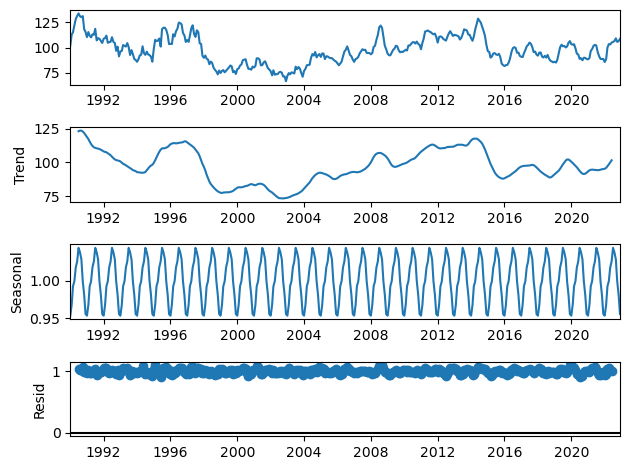

In [300]:
import statsmodels.tsa.api as tsa

result = tsa.seasonal_decompose(data2, model='multiplicative', period = 12)
figure=result.plot()

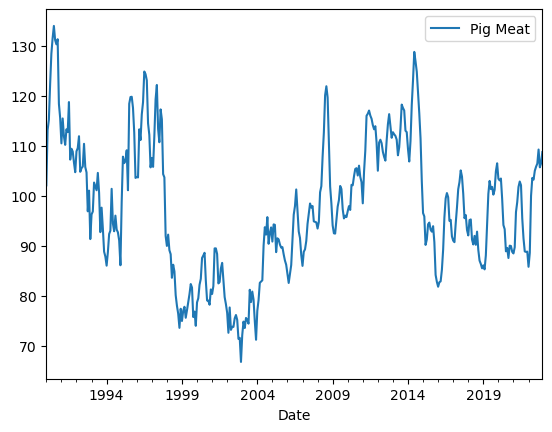

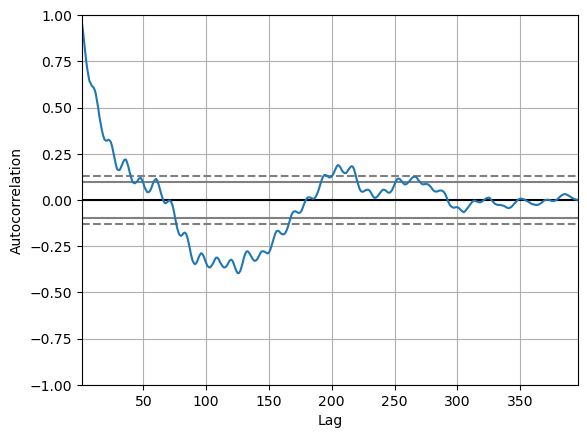

In [306]:
from pandas.plotting import autocorrelation_plot

data2 = pd.read_excel('Meat_Price_Index.xlsx')
data2 = data2.tail(-1)
data2 = data2[['Date', 'Pig Meat']]
data2 = data2.set_index('Date')
data2.plot()
plt.show()
autocorrelation_plot(data2)
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  396
Model:             SARIMAX(2, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1079.847
Date:                            Sun, 05 Mar 2023   AIC                           2169.693
Time:                                    23:13:27   BIC                           2189.588
Sample:                                01-01-1990   HQIC                          2177.575
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0858      0.048      1.772      0.076      -0.009       0.181
ar.L2          0.1022      0.051   

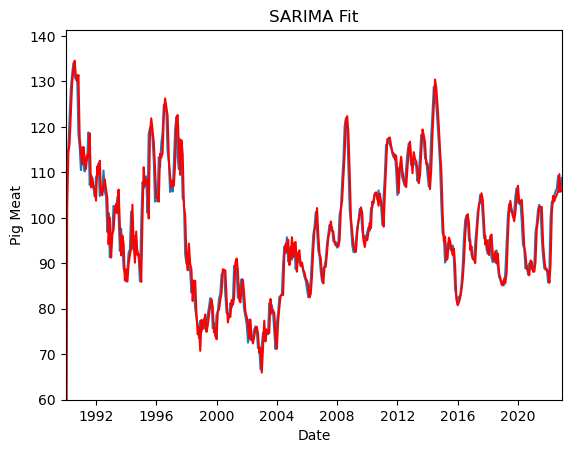

In [314]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Import data
data2 = pd.read_excel('Meat_Price_Index.xlsx')
data2 = data2.set_index('Date')
data2 = data2.dropna()
y = data2['Pig Meat']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Pig Meat')
plt.xlim(data2.index[0], data2.index[-1]) # Define the range of values on the x-axis.
plt.ylim(60, None) # Limit the y-axis from 50
plt.show()

In [317]:
from statsmodels.tsa.arima_model import ARIMA

####fit model
p = 2 #number of lags
d = 1 #degree of differencing
q = 0 #size of the moving average window

model = tsa.arima.ARIMA(data2['Pig Meat'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               Pig Meat   No. Observations:                  396
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1088.249
Date:                Sun, 05 Mar 2023   AIC                           2182.498
Time:                        23:16:58   BIC                           2194.434
Sample:                    01-01-1990   HQIC                          2187.227
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1189      0.047      2.552      0.011       0.028       0.210
ar.L2          0.1308      0.048      2.707      0.007       0.036       0.226
sigma2        14.4698      0.773     18.709      0.0

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [322]:
data2 = data2[['Pig Meat']]

ARIMA(2,1,0)

In [326]:
from statsmodels.tsa.arima.model import ARIMA

# Treinar o modelo ARIMA
p = 2
d = 1
q = 0

model = ARIMA(data2[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data2['2021-01-01':'2022-12-01']
#são dados

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)


print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

MAE: 10.276701059247912
MSE: 158.37344098991358
RMSE: 12.584651007871198
R²: -1.7701998403592736


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 0)x(2, 0, 0, 12)

In [329]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Treinar o modelo SARIMA
p = 2
d = 1
q = 0
P = 2  # seasonal order
D = 0  # seasonal difference
Q = 0  # seasonal moving average order
s = 12  # seasonal period

model = SARIMAX(data2[:'2020-12-01'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data2['2021-01-01':'2022-12-01']
#são dados

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 11.425111321094539
MSE: 194.95355406436025
RMSE: 13.962576913462652
R²: -2.4100433820905547


LSTM RNN

In [337]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregando os dados
data2 = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removendo valores nulos
data2.dropna(subset=['Pig Meat'], inplace=True)

# Convertendo a coluna de datas para valores numéricos
data2['days_since'] = (data2.index - data2.index.min()).days

# Separando os dados em treino e teste
train_data, test_data = train_test_split(data2['Pig Meat'], test_size=0.2, shuffle=False)

# Normalizando os dados
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparando os dados para o modelo LSTM
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Fazendo previsões
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Avaliando o modelo
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 4s 45ms/step - loss: 0.2034
Epoch 2/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0610
Epoch 3/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0442
Epoch 4/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0301
Epoch 5/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0244
Epoch 6/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0270
Epoch 7/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0228
Epoch 8/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0189
Epoch 9/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0207
Epoch 10/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0197
Epoch 11/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0181
Epoch 12/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0184
Epoch 13/50
4/4 [==============================] - 0s 44ms/st

ARIMA/SARIMA no periodo base 1990-2022 + projeções a 5 anos (de 2023 até 2027)

In [340]:
start_date = data2.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data2.loc[start_date:end_date, 'Pig Meat']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

MAE: 97.60823344027787
MSE: 9710.358175347488
RMSE: 98.54114965509326
R²: -52.06469366469074
MAPE: 1.0


Bovine Meat

In [296]:
data3 = pd.read_excel('Meat_Price_Index.xlsx')
data3 = data3.tail(-1)
data3 = data3[['Date', 'Bovine Meat']]
data3 = data3.set_index(data3['Date'])
data3 = data3.drop(['Date'], axis=1)

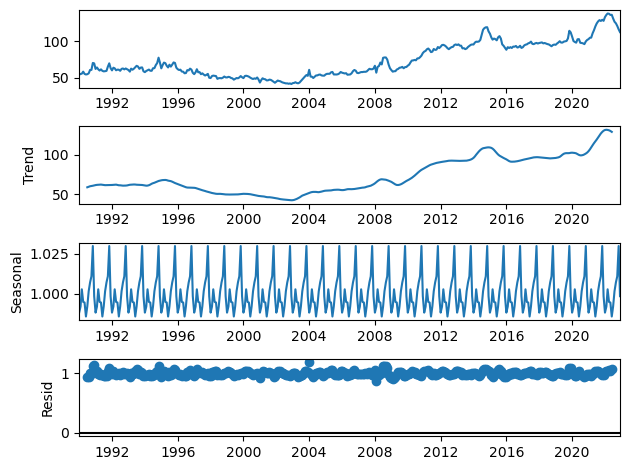

In [301]:
import statsmodels.tsa.api as tsa

result = tsa.seasonal_decompose(data3, model='multiplicative', period = 12)
figure=result.plot()

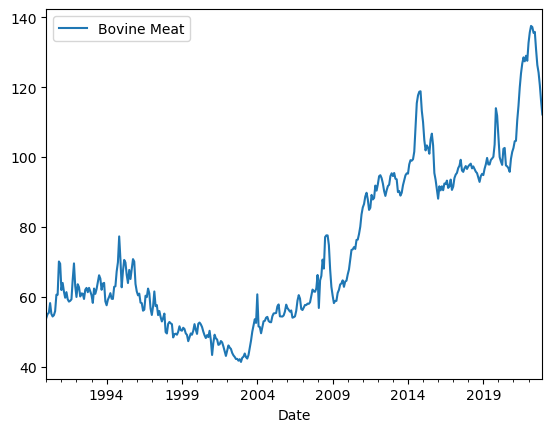

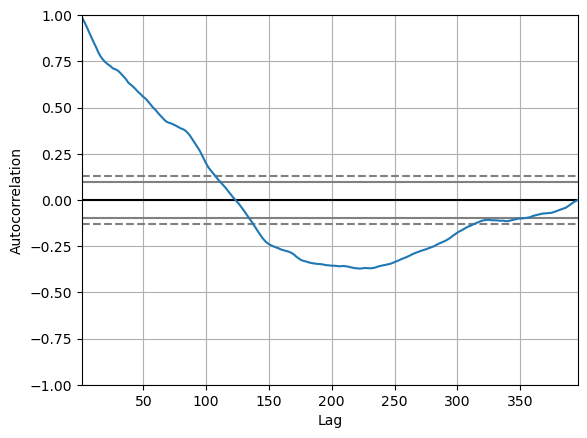

In [305]:
from pandas.plotting import autocorrelation_plot

data3 = pd.read_excel('Meat_Price_Index.xlsx')
data3 = data3.tail(-1)
data3 = data3[['Date', 'Bovine Meat']]
data3 = data3.set_index('Date')
data3.plot()
plt.show()
autocorrelation_plot(data3)
plt.show()

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  396
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -930.380
Date:                              Sun, 05 Mar 2023   AIC                           1868.760
Time:                                      23:13:03   BIC                           1884.676
Sample:                                  01-01-1990   HQIC                          1875.066
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1359      0.036      3.810      0.000       0.066       0.206
ar.S.L12       0.88

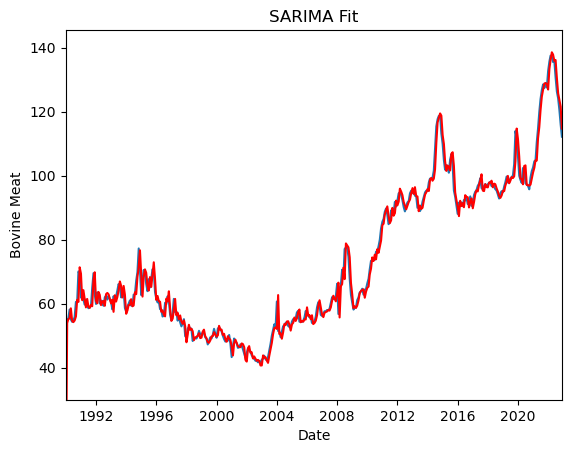

In [313]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Import data
data3 = pd.read_excel('Meat_Price_Index.xlsx')
data3 = data3.set_index('Date')
data3 = data3.dropna()
y = data3['Bovine Meat']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Bovine Meat')
plt.xlim(data3.index[0], data3.index[-1]) # Define the range of values on the x-axis.
plt.ylim(30, None) # Limit the y-axis from 50
plt.show()

In [316]:
from statsmodels.tsa.arima_model import ARIMA

####fit model
p = 1 #number of lags
d = 1 #degree of differencing
q = 0 #size of the moving average window

model = tsa.arima.ARIMA(data3['Bovine Meat'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:            Bovine Meat   No. Observations:                  396
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -941.403
Date:                Sun, 05 Mar 2023   AIC                           1886.807
Time:                        23:16:18   BIC                           1894.765
Sample:                    01-01-1990   HQIC                          1889.960
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1173      0.035      3.373      0.001       0.049       0.185
sigma2         6.8805      0.333     20.647      0.000       6.227       7.534
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [320]:
data3 = data3[['Bovine Meat']]

ARIMA(1,1,0)

In [325]:
from statsmodels.tsa.arima.model import ARIMA

# Treinar o modelo ARIMA
p = 1
d = 1
q = 0

model = ARIMA(data3[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data3['2021-01-01':'2022-12-01']
#são dados

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)


print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

MAE: 21.947292504430077
MSE: 593.3821303283472
RMSE: 24.359436166059904
R²: -4.311655888642174


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)x(1, 0, 1, 12)

In [332]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Treinar o modelo SARIMA
p = 1
d = 1
q = 0
P = 1  # seasonal order
D = 0  # seasonal difference
Q = 1  # seasonal moving average order
s = 12  # seasonal period

model = SARIMAX(data3[:'2020-12-01'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data3['2021-01-01':'2022-12-01']
#são dados

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

MAE: 22.551570660916713
MSE: 618.3983484677549
RMSE: 24.867616461328875
R²: -4.535588386100792


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


LSTM RNN

In [335]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregando os dados
data3 = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removendo valores nulos
data3.dropna(subset=['Bovine Meat'], inplace=True)

# Convertendo a coluna de datas para valores numéricos
data3['days_since'] = (data3.index - data3.index.min()).days

# Separando os dados em treino e teste
train_data, test_data = train_test_split(data3['Bovine Meat'], test_size=0.2, shuffle=False)

# Normalizando os dados
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparando os dados para o modelo LSTM
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Fazendo previsões
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Avaliando o modelo
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 4s 48ms/step - loss: 0.0937
Epoch 2/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0186
Epoch 3/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0177
Epoch 4/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0091
Epoch 5/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0122
Epoch 6/50
4/4 [==============================] - 0s 50ms/step - loss: 0.0085
Epoch 7/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0068
Epoch 8/50
4/4 [==============================] - 0s 50ms/step - loss: 0.0070
Epoch 9/50
4/4 [==============================] - 0s 48ms/step - loss: 0.0055
Epoch 10/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0058
Epoch 11/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0054
Epoch 12/50
4/4 [==============================] - 0s 50ms/step - loss: 0.0054
Epoch 13/50
4/4 [==============================] - 0s 50ms/st

ARIMA/SARIMA no periodo base 1990-2022 + projeções a 5 anos (de 2023 até 2027)

In [343]:
start_date = data3.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data3.loc[start_date:end_date, 'Bovine Meat']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

MAE: 73.32358667767171
MSE: 5919.575438117837
RMSE: 76.93877720706143
R²: -9.897055232130203
MAPE: 1.0


Ovine Meat

In [295]:
data4 = pd.read_excel('Meat_Price_Index.xlsx')
data4 = data4.tail(-1)
data4 = data4[['Date', 'Ovine Meat']]
data4 = data4.set_index(data4['Date'])
data4 = data4.drop(['Date'], axis=1)

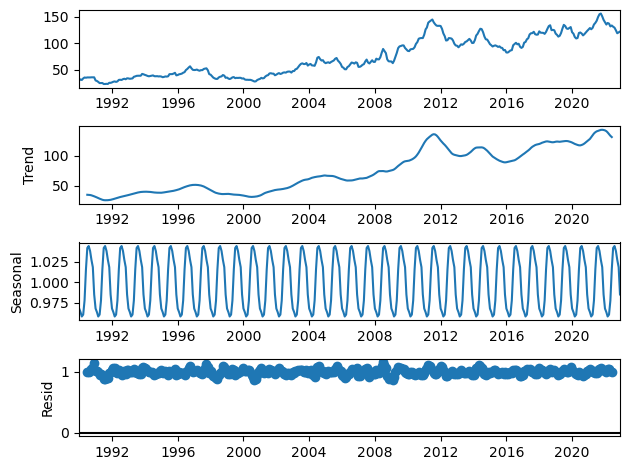

In [302]:
import statsmodels.tsa.api as tsa

result = tsa.seasonal_decompose(data4, model='multiplicative', period = 12)
figure=result.plot()

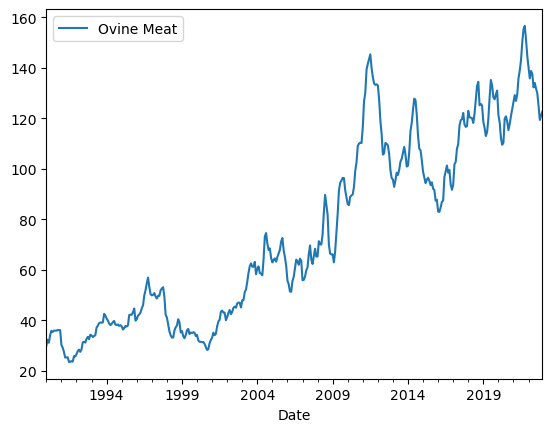

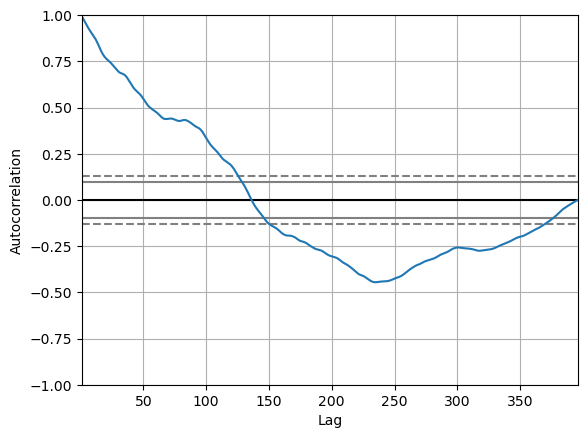

In [304]:
from pandas.plotting import autocorrelation_plot

data4 = pd.read_excel('Meat_Price_Index.xlsx')
data4 = data4.tail(-1)
data4 = data4[['Date', 'Ovine Meat']]
data4 = data4.set_index('Date')
data4.plot()
plt.show()
autocorrelation_plot(data4)
plt.show()


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  396
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 12)   Log Likelihood                -985.008
Date:                             Sun, 05 Mar 2023   AIC                           1980.015
Time:                                     23:12:23   BIC                           1999.910
Sample:                                 01-01-1990   HQIC                          1987.898
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3808      0.055     25.134      0.000       1.273       1.489
ar.L2         -0.4391      

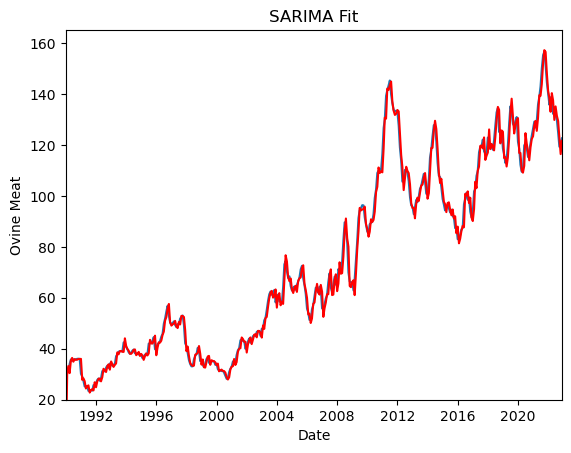

In [312]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Import data
data4 = pd.read_excel('Meat_Price_Index.xlsx')
data4 = data4.set_index('Date')
data4 = data4.dropna()
y = data4['Ovine Meat']

# Find the best SARIMA model using auto_arima
model1 = pm.auto_arima(y, seasonal=True, m=12)

# Print the model summary
print(model1.summary())

# Plot the fitted values and actual values
plt.plot(y)
plt.plot(model1.predict_in_sample(), color='red')
plt.title('SARIMA Fit')
plt.xlabel('Date')
plt.ylabel('Ovine Meat')
plt.xlim(data4.index[0], data4.index[-1]) # Define the range of values on the x-axis.
plt.ylim(20, None) # Limit the y-axis from 50
plt.show()

In [315]:
from statsmodels.tsa.arima_model import ARIMA

####fit model
p = 2 #number of lags
d = 1 #degree of differencing
q = 1 #size of the moving average window

model = tsa.arima.ARIMA(data4['Ovine Meat'], order=(p,d,q))
result = model.fit()

#summary of fit model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             Ovine Meat   No. Observations:                  396
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -988.429
Date:                Sun, 05 Mar 2023   AIC                           1984.858
Time:                        23:15:32   BIC                           2000.773
Sample:                    01-01-1990   HQIC                          1991.164
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3537      0.078     17.427      0.000       1.201       1.506
ar.L2         -0.4366      0.047     -9.331      0.000      -0.528      -0.345
ma.L1         -0.9107      0.071    -12.899      0.0

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [319]:
data4 = data4[['Ovine Meat']]

ARIMA(2,1,1)

In [324]:
from statsmodels.tsa.arima.model import ARIMA

# Treinar o modelo ARIMA
p = 2
d = 1
q = 1

model = ARIMA(data4[:'2020-12-01'], order=(p,d,q))
model_fit = model.fit()

#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data4['2021-01-01':'2022-12-01']
#são dados

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)


print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

MAE: 12.411258106924459
MSE: 246.04239521186432
RMSE: 15.685738593125423
R²: -1.3382525656454178


C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-inv

SARIMAX(2, 1, 1)x(1, 0, [], 12)

In [333]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Treinar o modelo SARIMA
p = 2
d = 1
q = 1
P = 1  # seasonal order
D = 0  # seasonal difference
Q = []  # seasonal moving average order
s = 12  # seasonal period

model = SARIMAX(data4[:'2020-12-01'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

#Faz previsões na série temporal de teste
#feita pelo modelo
preds = model_fit.predict(start='2021-01-01', end='2022-12-01', dynamic=False)

actuals = data4['2021-01-01':'2022-12-01']
#são dados

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(actuals, preds)
mse = mean_squared_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
r2 = r2_score(actuals, preds)
#mape = mape(actuals, preds)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
#print('MAPE', mape)

C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\tools\anaconda3\envs\teste\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 14.231124870032495
MSE: 301.4303096413658
RMSE: 17.36174846152788
R²: -1.8646290582373162


LSTM RNN

In [336]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregando os dados
data4 = pd.read_excel('Meat_Price_Index.xlsx', parse_dates=['Date'], index_col='Date')

# Removendo valores nulos
data4.dropna(subset=['Ovine Meat'], inplace=True)

# Convertendo a coluna de datas para valores numéricos
data4['days_since'] = (data4.index - data4.index.min()).days

# Separando os dados em treino e teste
train_data, test_data = train_test_split(data4['Ovine Meat'], test_size=0.2, shuffle=False)

# Normalizando os dados
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

# Preparando os dados para o modelo LSTM
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(60, len(test_data)):
    X_test.append(test_data_scaled[i-60:i, 0])
    y_test.append(test_data_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Fazendo previsões
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

# Avaliando o modelo
mae = mean_absolute_error(test_data[60:], y_pred)
mse = mean_squared_error(test_data[60:], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_data[60:], y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

Epoch 1/50
4/4 [==============================] - 4s 47ms/step - loss: 0.1307
Epoch 2/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0246
Epoch 3/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0279
Epoch 4/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0116
Epoch 5/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0129
Epoch 6/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0131
Epoch 7/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0093
Epoch 8/50
4/4 [==============================] - 0s 62ms/step - loss: 0.0085
Epoch 9/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0087
Epoch 10/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0073
Epoch 11/50
4/4 [==============================] - 0s 48ms/step - loss: 0.0074
Epoch 12/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0072
Epoch 13/50
4/4 [==============================] - 0s 46ms/st

ARIMA/SARIMA no periodo base 1990-2022 + projeções a 5 anos (de 2023 até 2027)

In [342]:
start_date = data4.index[0]
end_date = pd.to_datetime('2027-12-01')
prediction = model_fit.predict(start=start_date, end=end_date, dynamic=True)

actuals = data4.loc[start_date:end_date, 'Ovine Meat']
mae = mean_absolute_error(actuals, prediction[-len(actuals):])
mse = mean_squared_error(actuals, prediction[-len(actuals):])
rmse = mean_squared_error(actuals, prediction[-len(actuals):], squared=False)
r2 = r2_score(actuals, prediction[-len(actuals):])
mape = mean_absolute_percentage_error(actuals, prediction[-len(actuals):])

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)
print('MAPE:', mape)

MAE: 74.27751848016281
MSE: 6866.858722255631
RMSE: 82.86651146425575
R²: -4.08765880008346
MAPE: 1.0
